In [1]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 11.4 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [23]:
stopwords_list = ['deu','todo','aqui','brasil','agora','hoje','dia','ainda','ano','porque','paí','q','covid','covid19','corona','coronga','virus','coronga','pra','rt','p','tá','vc','n','s','vc','vírus','víru']
# stopwords_list = ['q','pra','rt','p','tá','vc','n','s','vc']

emoji_list = ['🏻']

In [24]:
df = pd.read_csv('data_pt_brazil_normalized_emoji.csv', 
                 sep=',',
                 converters={
                     "normalized_text": lambda x: x.strip("[]").replace("'","").split(", "),
                     "emoji": lambda x: x.strip("[]").replace("'","").split(", "),
                 })

In [25]:
df = df[['created_at','text', 'sentiment','normalized_text','emoji']]

In [26]:
df.head()

,created_at,text,sentiment,normalized_text,emoji
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[rt, após, ficar, silêncio, cpi, covid, carlos...",[]
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[rt, lamber, fone, ouvido, lista, doenças, tra...",[]
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[definição, vacina, tipo, substância, vírus, b...",[]
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[rt, iphone, seguro, contra, vírus]",[]
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[rt, covid, tá, estragar, completamente, tudo]",[]


In [27]:
df['normalized_text'] = df.apply(lambda x: [word for word in x['normalized_text'] if word not in stopwords_list and len(word) > 2], axis=1)

In [28]:
df['emoji'] = df.apply(lambda x: [emoji for emoji in list(set(x['emoji'])) if not(emoji.startswith('\\')) and not((emoji.encode('unicode-escape')).startswith(b'\\U0001f3f'))], axis=1)

In [29]:
words_positivo = df[df['sentiment'] == 'Positivo']['normalized_text'].sum()

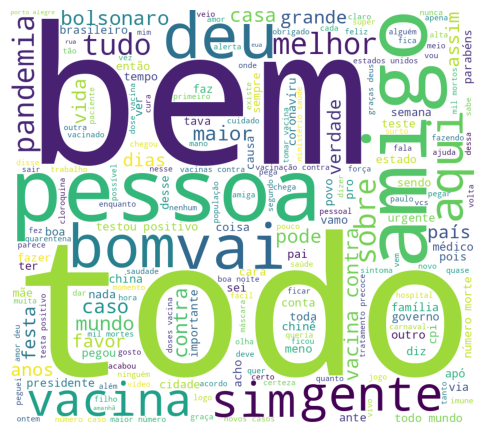

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


all_summary = " ".join(s for s in words_positivo)
stopwords = stopwords_list
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=900, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [31]:
words_negativo = df[df['sentiment'] == 'Negativo']['normalized_text'].sum()

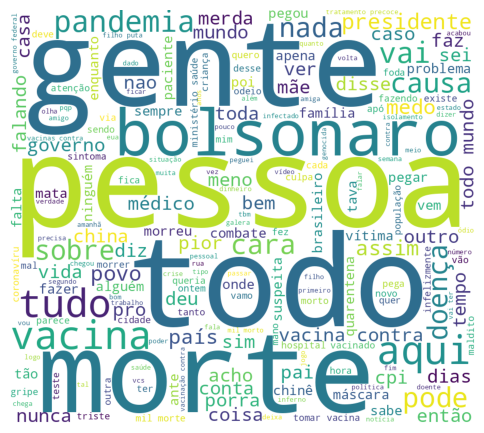

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


all_summary = " ".join(s for s in words_negativo)
stopwords = stopwords_list
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=900, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [13]:
emoji_positivo = df[(df['sentiment'] == 'Positivo') & (df['emoji'].str.len() > 2)]['emoji'].sum()

In [14]:
from collections import Counter
counts = Counter(emoji_positivo)
print(counts)

Counter({'🙏': 143, '💉': 92, '❤': 69, '🎁': 60, '🙌': 55, '✅': 55, '👏': 53, '♂': 47, '🔥': 47, '✨': 47, '😍': 46, '❌': 44, '😷': 43, '🤭': 43, '💛': 41, '🎉': 40, '🥺': 39, '🤦': 38, '❓': 38, '♥': 38, '😭': 37, '🦠': 37, '😝': 35, '🔞': 33, '👼': 33, '🎊': 32, '📆': 32, '☯': 32, '👭': 32, '📍': 32, '💳': 32, '🎲': 32, '📌': 32, '🌞': 32, '📏': 32, '👫': 32, '♀': 30, '🅱': 30, '😢': 28, '🌝': 28, '😂': 27, '🤷': 25, '🤔': 23, '😩': 22, '👉': 21, '😔': 21, '🥰': 21, '🥴': 21, '🤣': 20, '💪': 18, '😘': 17, '😎': 16, '⚠': 16, '🤩': 16, '⚪': 15, '👍': 14, '⚽': 14, '😡': 14, '👩': 14, '😳': 14, '❗': 14, '✌': 13, '✊': 13, '🤛': 13, '🤡': 13, '🤜': 12, '💙': 11, '🔵': 11, '👨': 11, '🤧': 11, '😅': 11, '😉': 10, '😱': 10, '🤬': 10, '⚫': 9, '🤝': 9, '🖤': 9, '🙄': 9, '☠': 9, '😤': 9, '🤮': 9, '👀': 9, '🤒': 9, '🔴': 8, '😁': 8, '👊': 8, '🥳': 8, '🚨': 8, '🍻': 8, '💯': 8, '💜': 8, '🥵': 7, '😃': 7, '💥': 7, '⚕': 7, '✝': 7, '😜': 7, '🏥': 7, '👇': 7, '💔': 7, '🍺': 7, '🤪': 7, '😴': 7, '😬': 7, '‼': 6, '😰': 6, '🔬': 6, '🧡': 6, '🎶': 6, '💚': 6, '🏆': 5, '🤗': 5, '🌾': 5, '🌹': 5, '👁':

In [15]:
emoji_negativo = df[(df['sentiment'] == 'Negativo') & (df['emoji'].str.len() > 2)]['emoji'].sum()

In [16]:
from collections import Counter
counts = Counter(emoji_negativo)
print(counts)

Counter({'🤦': 107, '♀': 94, '🙏': 74, '♂': 73, '💉': 69, '😭': 56, '😂': 53, '😷': 51, '🦠': 44, '✨': 42, '❤': 41, '🥺': 39, '🤔': 39, '🤷': 39, '🤣': 38, '😔': 37, '👉': 35, '😍': 35, '💛': 34, '😎': 33, '🔥': 33, '😡': 32, '🤭': 32, '🙄': 30, '♥': 30, '😝': 27, '🥰': 27, '🙌': 26, '🤡': 26, '⚠': 26, '😩': 24, '💳': 23, '📌': 23, '🌞': 23, '😅': 23, '☯': 22, '🔞': 22, '📍': 22, '🎁': 22, '📏': 22, '🤧': 22, '👍': 22, '🤬': 22, '👭': 21, '📆': 21, '👼': 21, '🌝': 21, '🎲': 21, '👫': 21, '😪': 21, '👏': 20, '😓': 20, '😢': 18, '🤩': 17, '⚪': 17, '⚽': 17, '🤪': 17, '👊': 17, '👀': 17, '😤': 16, '😠': 15, '💔': 15, '🤮': 15, '👇': 15, '🔴': 15, '😱': 15, '😜': 14, '✅': 14, '🔵': 14, '💪': 14, '😏': 14, '😳': 13, '👌': 13, '🖤': 12, '💚': 12, '😁': 12, '😒': 11, '☠': 11, '⏱': 11, '💩': 11, '😥': 11, '🥳': 10, '🤒': 10, '😖': 10, '😣': 10, '✌': 10, '🎉': 10, '😴': 10, '💙': 9, '🚨': 9, '⚰': 9, '🤯': 9, '😉': 9, '🍻': 9, '🤨': 8, '😰': 8, '🚩': 8, '🏃': 8, '🥵': 8, '👨': 8, '⚕': 8, '😕': 8, '👩': 8, '👈': 8, '▶': 8, '😟': 7, '😈': 7, '👎': 7, '💥': 7, '😄': 7, '😆': 7, '💀': 7, '😌': 7

findfont: Font family ['Symbola'] not found. Falling back to DejaVu Sans.


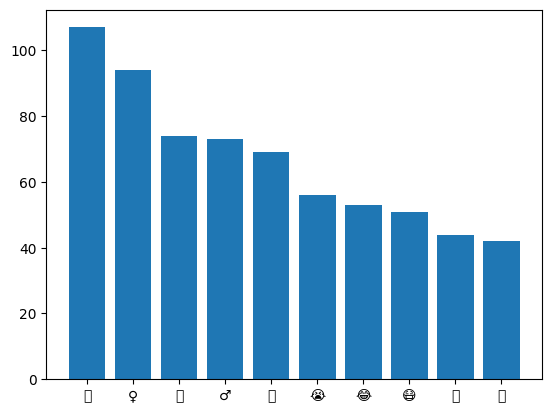

In [76]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'Symbola',
        'mathtext.fontset': 'stix',
    }
)

da = counts.most_common(10)
plt.bar(range(10), [freq for (item, freq) in da], tick_label=[item for (item, freq) in da])
plt.show()

In [58]:
counts.most_common(5)

[('🤦', 107), ('♀', 94), ('🙏', 74), ('♂', 73), ('💉', 69)]

In [17]:
import nltk
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [18]:
df['normalized_text_stemm'] = df.apply(lambda x: [stemmer.stem(word) for word in x['normalized_text']], axis=1)

In [19]:
df.head()

,created_at,text,sentiment,normalized_text,emoji,normalized_text_stemm
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[após, ficar, silêncio, cpi, carlos, wizard, r...",[],"[após, fic, silênci, cpi, carl, wizard, retorn..."
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[lamber, fone, ouvido, lista, doenças, transmi...",[],"[lamb, fon, ouv, list, doenç, transmiss, oral,..."
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[definição, vacina, tipo, substância, bactéria...",[],"[defin, vacin, tip, subst, bactér, introduz, c..."
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[iphone, seguro, contra]",[],"[iphon, segur, contr]"
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[estragar, completamente, tudo]",[],"[estrag, complet, tud]"


In [20]:
df['emoji_normalized_text'] = df['normalized_text'] + df['emoji'] 

In [21]:
df['normalized_text_stemm_emoji'] =  df['normalized_text_stemm'] + df['emoji'] 

In [22]:
df[df['emoji_normalized_text'].str.len() > 0].to_csv(
    'data_pt_brazil_normalized_emoji_merged.csv', 
    sep=',',
    index=False)

In [23]:
df.head()

,created_at,text,sentiment,normalized_text,emoji,normalized_text_stemm,emoji_normalized_text,normalized_text_stemm_emoji
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[após, ficar, silêncio, cpi, carlos, wizard, r...",[],"[após, fic, silênci, cpi, carl, wizard, retorn...","[após, ficar, silêncio, cpi, carlos, wizard, r...","[após, fic, silênci, cpi, carl, wizard, retorn..."
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[lamber, fone, ouvido, lista, doenças, transmi...",[],"[lamb, fon, ouv, list, doenç, transmiss, oral,...","[lamber, fone, ouvido, lista, doenças, transmi...","[lamb, fon, ouv, list, doenç, transmiss, oral,..."
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[definição, vacina, tipo, substância, bactéria...",[],"[defin, vacin, tip, subst, bactér, introduz, c...","[definição, vacina, tipo, substância, bactéria...","[defin, vacin, tip, subst, bactér, introduz, c..."
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[iphone, seguro, contra]",[],"[iphon, segur, contr]","[iphone, seguro, contra, ]","[iphon, segur, contr, ]"
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[estragar, completamente, tudo]",[],"[estrag, complet, tud]","[estragar, completamente, tudo, ]","[estrag, complet, tud, ]"


In [24]:
df.count()

created_at                     200000
text                           200000
sentiment                      200000
normalized_text                200000
emoji                          200000
normalized_text_stemm          200000
emoji_normalized_text          200000
normalized_text_stemm_emoji    200000
dtype: int64

In [25]:
df.groupby('sentiment').size()

sentiment
Negativo    93560
Neutro      58975
Positivo    47465
dtype: int64